In [1]:
#엔트로피 불순도는 값이 클수록 더 불확실,에측이 어렵고
#계산이 오래걸림

#지니 불순도는 얼마나 다양하게 섞여있는지를 평가함.
#지니가 CART에서 잘쓰임
#graphviz,pydotplus라이브러리 이용하면 예쁘게 의사결정나무 시각화가능

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
titanic= sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
dfy=titanic['survived'].copy()

In [9]:
dfX = titanic.drop(['survived'], axis=1)

In [10]:
dfX['age'].isnull().mean()

0.19865319865319866

In [11]:
feature_list = ['pclass','sex','age'] 

dfX = titanic[feature_list].copy() 

dfX 

,pclass,sex,age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


In [12]:
from sklearn.preprocessing import LabelEncoder
dfX['sex'] = LabelEncoder().fit_transform(dfX['sex'])
dfX['sex'].value_counts()

sex
1    577
0    314
Name: count, dtype: int64

In [13]:
dfX['age'].fillna(dfX['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [14]:
dfX

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


In [15]:
#pclass의 원핫인코딩(일반적이지 않게했는데 이것도 괜찮을지도?????)
#보통 타깃변수를 바꾸기위해 쓰는데 이분은 그냥쓰셨네..?
#한가지 열에 대해서만 원핫인코딩할때 쓴다고 이해해도 될듯
from sklearn.preprocessing import LabelBinarizer



dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(titanic['pclass']),
                   columns=['c1','c2','c3'],
                   index=dfX.index)

In [16]:
dfX=pd.concat([dfX,dfX2],axis=1)

In [17]:
dfX.drop(['pclass'],axis=1,inplace=True)

In [18]:
dfX

,sex,age,c1,c2,c3
0,1,22.0,0,0,1
1,0,38.0,1,0,0
2,0,26.0,0,0,1
3,0,35.0,1,0,0
4,1,35.0,0,0,1
...,...,...,...,...,...
886,1,27.0,0,1,0
887,0,19.0,1,0,0
888,0,NaN,0,0,1
889,1,26.0,1,0,0


In [19]:
#데이터분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX,dfy,test_size=0.25,random_state=101)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtmodel= DecisionTreeClassifier(
                       criterion='gini',
                       max_depth=3,
                       min_samples_leaf=5
                      )
dtmodel.fit(X_train, y_train)
dtmodel

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [21]:
y_pred=dtmodel.predict(X_train)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

In [22]:
pd.crosstab(y_train,y_pred,margins=True)

col_0,0,1,All
survived,,,
0,364,58,422
1,63,183,246
All,427,241,668


In [23]:
#pip install graphviz pydotplus

In [24]:
from IPython.display import Image# for visualizing the tree
import pydotplus
 
# 의사 결정 나무를 시각화하기 위해서 라이브러리를 임포트합니다.
from sklearn.tree import export_graphviz

In [25]:
#시각화를 위한 함수를 작성한다.
def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    print(graph)
    graph.write_png(png_file_to_save)
    return Image(graph.create_png())

In [26]:
def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    print(graph)
    graph.write_png(png_file_to_save)
    return Image(graph.create_png())

In [27]:
#tree_graph_to_png(tree=dtmodel,  feature_names=dfX.columns.values,
#                  class_names=['NotSurvived', 'Survived'],
#                  png_file_to_save='decision_tree.png')

In [28]:
#!sudo apt-get update
#!sudo apt-get install -y graphviz

In [29]:
#설치가 쉽지않음

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
accuracy_score(y_test,y_pred) 

In [ ]:
print(classification_report(y_test, y_pred))  

In [ ]:
from sklearn import metrics
y_test_proba = dtmodel.predict_proba(X_test)[:,1]

metrics.roc_curve(y_test, y_test_proba)
metrics.roc_auc_score(y_test,y_test_proba)

In [33]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
 
# 데이터 불러오기
iris = load_iris()
 
#dataframe으로 변경
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
 
#타겟 추가
iris_df['species'] = iris.target

In [35]:
iris_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [36]:
iris_df.species.value_counts() 

species
0    50
1    50
2    50
Name: count, dtype: int64

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

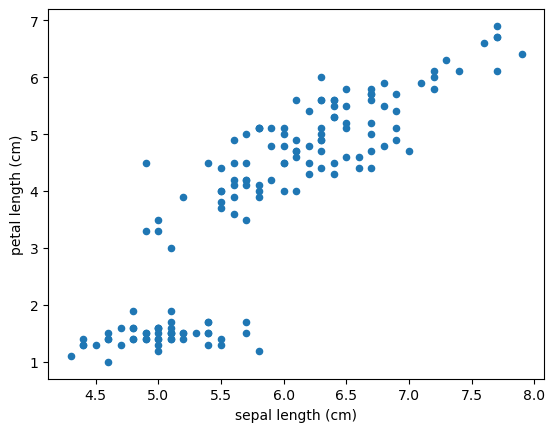

In [37]:
iris_df.plot(kind='scatter', x='sepal length (cm)', y='petal length (cm)') 

In [38]:
iris_df.columns 

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [47]:
# split data 
X = iris_df.iloc[:,:4] 
y = iris_df['species']

In [66]:
#train-test나누기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=101)

In [67]:
#DT 생성
dtmodel = DecisionTreeClassifier(random_state=101)
dtmodel.fit(X_train, y_train)
score = dtmodel.score(X_test, y_test)
score

0.9666666666666667

In [68]:
from sklearn.preprocessing import StandardScaler
#스케일링
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)#이거 fit이아니고 transform인거 알겠지?

In [69]:
#DT 생성
dtmodel = DecisionTreeClassifier(random_state=101)
dtmodel.fit(X_train, y_train)
score = dtmodel.score(X_test, y_test)
score

0.9666666666666667

In [70]:
from sklearn.model_selection import cross_val_score, GridSearchCV

cross_acc = cross_val_score(dtmodel, X_train, y_train, cv=3)
cross_acc

array([0.975, 0.975, 0.95 ])

In [71]:
param_grid = {'max_depth': [3,5,7], 
            'min_samples_split': [2,3,4]} 

In [72]:
gr_search = GridSearchCV(DecisionTreeClassifier(random_state=101), param_grid, cv=3) 
gr_search 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 3, 4]})

In [73]:
gr_search.fit(X, y) 
gr_search.best_params_ 

{'max_depth': 3, 'min_samples_split': 2}

In [74]:
gr_search.best_score_ 

0.9733333333333333

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9666666666666667